In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

<b>Loading and Reviewing the Data

In [9]:
data_frame=pd.read_csv("C:\\Users\\Aleena Prakash\\Desktop\\Mini Project\\diabetes.csv")

In [10]:
data_frame.shape

(768, 9)

In [11]:
data_frame.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
data_frame.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<b>Check for null Values</b>

In [13]:
print(data_frame.isnull().values.any())

False


<b>Check Wheather the Data set is Balanced or not

In [14]:
diabetes_true_Count=len(data_frame.loc[data_frame['Outcome']==True])
diabetes_false_Count=len(data_frame.loc[data_frame['Outcome']==False])

In [15]:
(diabetes_true_Count,diabetes_false_Count)

(268, 500)

<b>Analyzing Data</b>

In [16]:
def plot_corr(data_frame,size=11):
    corr=data_frame.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.coulmns)),corr.columns)
    plt.yticks(range(len(corr.coulmns)),corr.columns)

In [17]:
data_frame.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

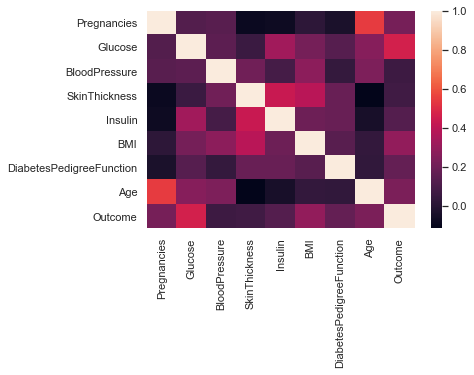

In [18]:
sns.heatmap(data_frame.corr())

<b>Mold Data</b>

Data Types

In [19]:
data_frame.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


No Need to Change any Data Types

<b>Check For Null Values

In [20]:
data_frame.isnull().values.any()

False

<b>Checking Class Distribution

In [21]:
num_obs = len(data_frame)
num_true = len(data_frame.loc[data_frame['Outcome']==1])
num_false = len(data_frame.loc[data_frame['Outcome']==0])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true,((1.00*num_true)/(1.0*num_obs))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false,((1.00*num_false)/(1.0*num_obs))*100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


Good distribution of true and false cases. No special Work needed.

<b>Spliting the Data</b>

70% as Training set and 30% as test set

In [22]:
from sklearn.model_selection import train_test_split
feature_col_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class_names=['Outcome']
X=data_frame[feature_col_names].values
Y=data_frame[predicted_class_names].values
split_test_size = 0.30
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=split_test_size,random_state=0)

In [23]:
trainval = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
testval = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% in training set".format(trainval * 100)) 
print("{0:0.2f}% in test set".format(testval*100))

69.92% in training set
30.08% in test set


<b>Varifying predicted value was split correctly?

In [24]:
print("Original True : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['Outcome']==1]),(len(data_frame.loc[data_frame['Outcome']==1])/len(data_frame.index))*100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['Outcome']==0]),(len(data_frame.loc[data_frame['Outcome']==0])/len(data_frame.index))*100.0))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train) * 100.0)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test) * 100.0)))
print("Test False : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test) * 100.0)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 194 (36.13%)
Training False : 343 (63.87%)

Test True : 74 (32.03%)
Test False : 157 (67.97%)


<b>Post-split Data Preparation

In [25]:
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
print("#rows in dataframe{0}".format(len(data_frame)))
print("#rows missing Glucose :{0}".format(len(data_frame.loc[data_frame['Glucose'] ==0])))
print("#rows missing BloodPressure :{0}".format(len(data_frame.loc[data_frame['BloodPressure'] ==0])))
print("#rows missing SkinThickness:{0}".format(len(data_frame.loc[data_frame['SkinThickness'] ==0])))
print("#rows missing Insulin:{0}".format(len(data_frame.loc[data_frame['Insulin'] ==0])))
print("#rows missing BMI:{0}".format(len(data_frame.loc[data_frame['BMI'] ==0])))
print("#rows missing DiabetesPedigreeFunction:{0}".format(len(data_frame.loc[data_frame['DiabetesPedigreeFunction'] ==0])))
print("#rows missing Age:{0}".format(len(data_frame.loc[data_frame['Age'] ==0])))


#rows in dataframe768
#rows missing Glucose :5
#rows missing BloodPressure :35
#rows missing SkinThickness:227
#rows missing Insulin:374
#rows missing BMI:11
#rows missing DiabetesPedigreeFunction:0
#rows missing Age:0


<b>Impute With Mean

In [27]:
from sklearn.impute import SimpleImputer
fill_0=SimpleImputer(missing_values=0,strategy="mean")
X_train=fill_0.fit_transform(X_train)
X_test=fill_0.fit_transform(X_test)


<b>Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
lr_cv_model=LogisticRegressionCV(n_jobs=-1,random_state=42,Cs=3,cv=10,refit=False,class_weight="balanced")
#setting number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train,Y_train.ravel())
lr_cv_predict_test=lr_cv_model.predict(X_test)
#training metrics
print("Confusion Matrix")
print(metrics.confusion_matrix(Y_test,lr_cv_predict_test,labels=[1,0]))
print("")
print("Classification Report")
print(metrics.classification_report(Y_test,lr_cv_predict_test,labels=[1,0]))
print("")
###Creating Confusion matrix and save confusion matrix and slice into four pieces
dm=metrics.confusion_matrix(Y_test,lr_cv_predict_test,labels=[1,0])
TP=dm[1][1]
TN=dm[0][0]
FP=dm[0][1]
FN=dm[1][0]
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(Y_test,lr_cv_predict_test)))
Error_rate=((FN+FP)/(TP+TN+FP+FN))
print("Error:",end="")
print(round(Error_rate,4))
Sensitivity=((TP)/(TP+FN))
print("Sensitivity:",end="")
print(round(Sensitivity,4))
Specificity=((TN)/(TN+FP))
print("Specificity:",end="")
print(round(Specificity,4))
Precision=((TP)/(TP+FP))
print("Precision:",end="")
print(round(Precision,4))
f1=((2*(Precision*Sensitivity))/(Precision+Sensitivity))
print("F-Measure:",end="")
print(round(f1,4))

Confusion Matrix
[[ 44  30]
 [ 30 127]]

Classification Report
              precision    recall  f1-score   support

           1       0.59      0.59      0.59        74
           0       0.81      0.81      0.81       157

    accuracy                           0.74       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231


Accuracy:0.7403
Error:0.2597
Sensitivity:0.8089
Specificity:0.5946
Precision:0.8089
F-Measure:0.8089


<b>Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
#create Gaussian Naive Bayes model object and train it with the data
nb_model=GaussianNB()
nb_model.fit(X_train,Y_train.ravel())

GaussianNB()

<b>Performance On Training Data

In [32]:
#this returns array of predicted results
prediction_from_trained_data=nb_model.predict(X_train)

In [33]:
from sklearn import metrics
accuracy=metrics.accuracy_score(Y_train,prediction_from_trained_data)
print("Accuracy of our naive bayes model is :{0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is :0.7598


<b>Performance on Testing Data

In [34]:
#this returns array of predicted results from test_data
prediction_from_test_data=nb_model.predict(X_test)
accuracy=metrics.accuracy_score(Y_test,prediction_from_test_data)
print("Accuracy of our naive bayes model is :{0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is :0.7576


In [36]:
print("Confusion Matrix")
#labels for set 1=True to upper left and 0=false to lower right
print("{0}".format (metrics.confusion_matrix(Y_test,prediction_from_test_data,labels=[1,0])))
print("")
###Creating Confusion matrix and save confusion matrix and slice into four pieces
em=metrics.confusion_matrix(Y_test,prediction_from_test_data,labels=[1,0])
TP=em[1][1]
TN=em[0][0]
FP=em[0][1]
FN=em[1][0]
Error_rate=((FN+FP)/(TP+TN+FP+FN))
print("Error:",end="")
print(round(Error_rate,4))
Sensitivity=((TP)/(TP+FN))
print("Sensitivity:",end="")
print(round(Sensitivity,4))
Specificity=((TN)/(TN+FP))
print("Specificity:",end="")
print(round(Specificity,4))
Precision=((TP)/(TP+FP))
print("Precision:",end="")
print(round(Precision,4))
f1=((2*(Precision*Sensitivity))/(Precision+Sensitivity))
print("F-Measure:",end="")
print(round(f1,4))


Confusion Matrix
[[ 39  35]
 [ 21 136]]

Error:0.2424
Sensitivity:0.8662
Specificity:0.527
Precision:0.7953
F-Measure:0.8293


In [37]:
print("classification Report")
#labels for set 1=True to upper left and 0 =false to lower right
print("{0}".format(metrics.classification_report(Y_test,prediction_from_test_data,labels=[1,0])))

classification Report
              precision    recall  f1-score   support

           1       0.65      0.53      0.58        74
           0       0.80      0.87      0.83       157

    accuracy                           0.76       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



<b>Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
### Create Gaussian Naive Bayes model object and train it with the data
dt_model=DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train,Y_train.ravel())

DecisionTreeClassifier(random_state=10)

In [39]:
### This returns array of predicted results
prediction_from_trained_data=dt_model.predict(X_train)

In [40]:
from sklearn import metrics
accuracy=metrics.accuracy_score(Y_train,prediction_from_trained_data)
print("Accuracy of our DT model is:{0:.4f}".format(accuracy))

Accuracy of our DT model is:1.0000


In [41]:
dt_predict_test=dt_model.predict(X_test)
###Get accuracy
dt_accuracy_testdata = metrics.accuracy_score(Y_test,dt_predict_test)
###get accuracy
print("Accuracy:{0:.4f}".format(dt_accuracy_testdata))

Accuracy:0.7446


In [42]:
print("Confusion Matrix for DT")
### labels for set 1=True to upper left and 0 = false to lower right
print("{0}".format(metrics.confusion_matrix(Y_test,dt_predict_test, labels=[1, 0])))
print("")
###Creating Confusion matrix and save confusion matrix and slice into four pieces
fm=metrics.confusion_matrix(Y_test,dt_predict_test, labels=[1, 0])
TP=fm[1][1]
TN=fm[0][0]
FP=fm[0][1]
FN=fm[1][0]
Error_rate=((FN+FP)/(TP+TN+FP+FN))
print("Error:",end="")
print(round(Error_rate,4))
Sensitivity=((TP)/(TP+FN))
print("Sensitivity:",end="")
print(round(Sensitivity,4))
Specificity=((TN)/(TN+FP))
print("Specificity:",end="")
print(round(Specificity,4))
Precision=((TP)/(TP+FP))
print("Precision:",end="")
print(round(Precision,4))
f1=((2*(Precision*Sensitivity))/(Precision+Sensitivity))
print("F-Measure:",end="")
print(round(f1,4))


Confusion Matrix for DT
[[ 43  31]
 [ 28 129]]

Error:0.2554
Sensitivity:0.8217
Specificity:0.5811
Precision:0.8062
F-Measure:0.8139


In [43]:
print("Classification Report")
print("{0}".format(metrics.classification_report(Y_test,dt_predict_test,labels=[1,0])))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.58      0.59        74
           0       0.81      0.82      0.81       157

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



<b>Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
### Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(X_train,Y_train.ravel())

RandomForestClassifier(random_state=10)

<b>Predict Training Data

In [56]:
rf_predict_train = rf_model.predict(X_train)
### get Accuracy
rf_accuracy = metrics.accuracy_score(Y_train,rf_predict_train)
### Print accuracy
print("Accuracy:{0:.4f}".format(rf_accuracy))

Accuracy:1.0000


<b>Predict Testing Data

In [57]:
rf_predict_test = rf_model.predict(X_test)
print("Confusion Matrix for Random Forest")
print("{0}".format(metrics.confusion_matrix(Y_test,rf_predict_test,labels=[1,0])))
print("")
### get accuracy
rf_accuracy_testdata = metrics.accuracy_score(Y_test,rf_predict_test)
### print accuracy
print("Accuracy:{0:.4f}".format(rf_accuracy_testdata))
###Creating Confusion matrix and save confusion matrix and slice into four pieces
gm=metrics.confusion_matrix(Y_test,rf_predict_test,labels=[1,0])
TP=gm[1][1]
TN=gm[0][0]
FP=gm[0][1]
FN=gm[1][0]
Error_rate=((FN+FP)/(TP+TN+FP+FN))
print("Error:",end="")
print(round(Error_rate,4))
Sensitivity=((TP)/(TP+FN))
print("Sensitivity:",end="")
print(round(Sensitivity,4))
Specificity=((TN)/(TN+FP))
print("Specificity:",end="")
print(round(Specificity,4))
Precision=((TP)/(TP+FP))
print("Precision:",end="")
print(round(Precision,4))
f1=((2*(Precision*Sensitivity))/(Precision+Sensitivity))
print("F-Measure:",end="")
print(round(f1,4))


Confusion Matrix for Random Forest
[[ 37  37]
 [ 20 137]]

Accuracy:0.7532
Error:0.2468
Sensitivity:0.8726
Specificity:0.5
Precision:0.7874
F-Measure:0.8278


In [58]:
print("Classification Report")
print("{0}".format(metrics.classification_report(Y_test,rf_predict_test,labels=[1,0])))

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.50      0.56        74
           0       0.79      0.87      0.83       157

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



<b>Support Vector Machine

In [59]:
from sklearn.svm import SVC
### Create a RandomForestClassifier object
svm_model=SVC(kernel='linear',C=1,random_state=42)
svm_model.fit(X_train,Y_train.ravel())

SVC(C=1, kernel='linear', random_state=42)

In [60]:
### This returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [61]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_train,prediction_from_trained_data)
print("Accuracy of our SVM model is:{0:.4f}".format(accuracy))

Accuracy of our SVM model is:0.7765


In [62]:
svm_predict_test = svm_model.predict(X_test)
### Get accuracy
svm_accuracy_testdata=metrics.accuracy_score(Y_test,svm_predict_test)
### Print accuracy
print("Accuracy:{0:.4f}".format(svm_accuracy_testdata))

Accuracy:0.7662


In [69]:
print("Confusion Matrix for Support Vector Machine")
print("{0}".format(metrics.confusion_matrix(Y_test,svm_predict_test,labels=[1,0])))
print("")
###Creating Confusion matrix and save confusion matrix and slice into four pieces
hm=metrics.confusion_matrix(Y_test,svm_predict_test,labels=[1,0])
TP=hm[1][1]
TN=hm[0][0]
FP=hm[0][1]
FN=hm[1][0]
Error_rate=((FN+FP)/(TP+TN+FP+FN))
print("Error:",end="")
print(round(Error_rate,4))
Sensitivity=((TP)/(TP+FN))
print("Sensitivity:",end="")
print(round(Sensitivity,4))
Specificity=((TN)/(TN+FP))
print("Specificity:",end="")
print(round(Specificity,4))
Precision=((TP)/(TP+FP))
print("Precision:",end="")
print(round(Precision,4))
f1=((2*(Precision*Sensitivity))/(Precision+Sensitivity))
print("F-Measure:",end="")
print(round(f1,4))

Confusion Matrix for Support Vector Machine
[[ 37  37]
 [ 17 140]]

Error:0.2338
Sensitivity:0.8917
Specificity:0.5
Precision:0.791
F-Measure:0.8383


In [70]:
print("Classification Report")
print("{0}".format(metrics.classification_report(Y_test,svm_predict_test,labels=[1,0])))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.50      0.58        74
           0       0.79      0.89      0.84       157

    accuracy                           0.77       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.76      0.77      0.75       231



<b>K-Nearest Neighbors Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train.ravel())

KNeighborsClassifier()

In [72]:
### This returns array of predicted results
prediction_from_trained_data = knn.predict(X_train)

In [73]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_train,prediction_from_trained_data)
print("Accuracy of our KNN model is:{0:.4f}".format(accuracy))

Accuracy of our KNN model is:0.7896


In [74]:
print("Confusion Matrix for K-Nearest Neighbour Classifier")
Knn_predict_test = knn.predict(X_test)
print("{0}".format(metrics.confusion_matrix(Y_test,Knn_predict_test,labels=[1,0])))
print("")
### Get accuracy
svm_accuracy_testdata=metrics.accuracy_score(Y_test,Knn_predict_test)
### Print accuracy
print("Accuracy:{0:.4f}".format(svm_accuracy_testdata))
###Creating Confusion matrix and save confusion matrix and slice into four pieces
im=metrics.confusion_matrix(Y_test,Knn_predict_test,labels=[1,0])
TP=im[1][1]
TN=im[0][0]
FP=im[0][1]
FN=im[1][0]
Error_rate=((FN+FP)/(TP+TN+FP+FN))
print("Error:",end="")
print(round(Error_rate,4))
Sensitivity=((TP)/(TP+FN))
print("Sensitivity:",end="")
print(round(Sensitivity,4))
Specificity=((TN)/(TN+FP))
print("Specificity:",end="")
print(round(Specificity,4))
Precision=((TP)/(TP+FP))
print("Precision:",end="")
print(round(Precision,4))
f1=((2*(Precision*Sensitivity))/(Precision+Sensitivity))
print("F-Measure:",end="")
print(round(f1,4))

Confusion Matrix for K-Nearest Neighbour Classifier
[[ 38  36]
 [ 29 128]]

Accuracy:0.7186
Error:0.2814
Sensitivity:0.8153
Specificity:0.5135
Precision:0.7805
F-Measure:0.7975


In [75]:
print("Classification Report")
print("{0}".format(metrics.classification_report(Y_test,Knn_predict_test,labels=[1,0])))

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.51      0.54        74
           0       0.78      0.82      0.80       157

    accuracy                           0.72       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231

